# 🏋🏽‍♀️ Random Forest with Class Imbalance
The goal of this exercise is to investigate the performance of Random Forest on a dataset with class imbalance, and then use corrections strategies to improve performance.

Your final comparison may look like the table below (but not with these exact values):

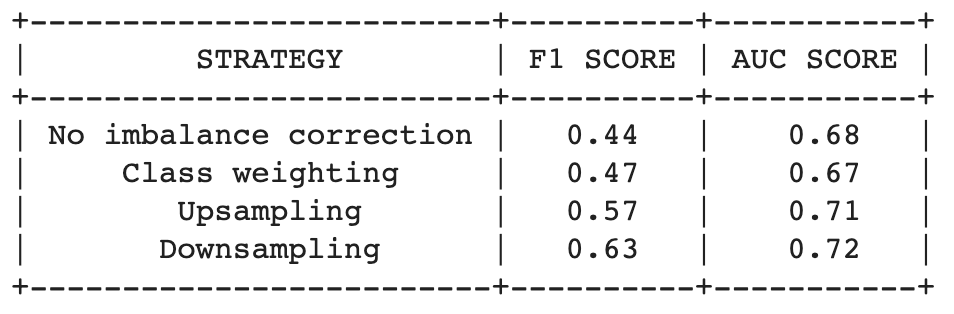

## Instructions:
- Read the dataset diabetes.csv as a pandas dataframe.

- Take a quick look at the dataset.

- Split the data into train and test sets.

- Perform classification with a Vanilla Random Forest which does not take into account class imbalance.

- Perform classification with a Balanced Random Forest which does take into account class imbalance.

- Upsample the data and perform classification with a Balanced Random Forest.

- Downsample the data and perform classification with a Balanced Random Forest.

- Compare the F1-Score and AUC Score of all 4 models.

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Code to read the dataset and take a quick look
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# Investigate the response variable for data imbalance
count0, count1 = df['Outcome'].value_counts()

print(f'The percentage of diabetics in the dataset is only {100*count1/(count0+count1):.2f}%')


The percentage of diabetics in the dataset is only 34.90%


In [30]:
# Assign the predictor and response variables
# "Outcome" is the response and all the other columns are the predictors
# Use the values of these features and response
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [31]:
# Fix a random_state
random_state = 42

# Split the data into train and validation sets
# Set random state as defined above and use a train size of 0.8
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8, random_state=random_state)


In [32]:
# Set the max_depth variable to 20 for all trees
max_depth = 20


## Strategy 1 - Vanilla Random Forest

- No correction for imbalance

In [33]:
# Define a Random Forest classifier with randon_state as above
# Set the maximum depth to be max_depth and use 10 estimators
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=10)

# Fit the model on the training set
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42)

In [34]:
### edTest(test_vanilla) ### 
# Use the trained model to predict on the validation set 
predictions = random_forest.predict(X_val)

# Compute two metrics that better represent misclassification of minority classes 
# i.e `F1 score` and `AUC`

# Compute the F1-score and assign it to variable score1
f_score = f1_score(y_val, predictions)
score1 = round(f_score, 2)

# Compute the AUC and assign it to variable auc1
auc_score = roc_auc_score(y_val, predictions)
auc1 = round(auc_score, 2)


## Strategy 2 - Random Forest with class weighting
- Balancing the class imbalance in each bootstrap

In [35]:
# Define a Random Forest classifier with randon_state as above
# Set the maximum depth to be max_depth and use 10 estimators
# Use class_weight as balanced_subsample to weigh the class accordingly
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=10, class_weight='balanced_subsample')

# Fit the model on the training set
random_forest.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       n_estimators=10, random_state=42)

In [36]:
### edTest(test_balanced) ###

# Use the trained model to predict on the validation set 
predictions = random_forest.predict(X_val)

# Compute two metrics that better represent misclassification of minority classes 
# i.e `F1 score` and `AUC`

# Compute the F1-score and assign it to variable score2
f_score = f1_score(y_val, predictions)
score2 = round(f_score, 2)

# Compute the AUC and assign it to variable auc2
auc_score = roc_auc_score(y_val, predictions)
auc2 = round(auc_score, 2)


## Strategy 3 - Balanced Random Forest with SMOTE 

- Using the **imblearn** `BalancedRandomForestClassifier()` 
- Read more about this implementation [here](https://imbalanced-learn.org/dev/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html?msclkid=3986326da86e11ec8dc5661b17fab1c6)

In [37]:
# Perform upsampling using SMOTE

# Define a SMOTE with random_state=2
sm = SMOTE(random_state=2)

# Use the SMOTE object to upsample the train data
# You may have to use ravel() 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [38]:
# Define a Random Forest classifier with randon_state as above
# Set the maximum depth to be max_depth and use 10 estimators
# Use class_weight as balanced_subsample to weigh the class accordingly
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=10, class_weight='balanced_subsample')

# Fit the Random Forest on upsampled data 
random_forest.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       n_estimators=10, random_state=42)

In [39]:
### edTest(test_upsample) ###

# Use the trained model to predict on the validation set 
predictions = random_forest.predict(X_val)

# Compute the F1-score and assign it to variable score3
f_score = f1_score(y_val, predictions)
score3 = round(f_score, 2)

# Compute the AUC and assign it to variable auc3
auc_score = roc_auc_score(y_val, predictions)
auc3 = round(auc_score, 2)


## Strategy 4 - Downsample the data

Using the imblearn RandomUnderSampler().

In [40]:
# Define an RandomUnderSampler instance with random state as 2
rs = RandomUnderSampler(random_state=2)

# Downsample the train data
# You may have to use ravel()
X_train_res, y_train_res = rs.fit_resample(X_train, y_train)


In [41]:
# Define a Random Forest classifier with randon_state as above
# Set the maximum depth to be max_depth and use 10 estimators
# Use class_weight as balanced_subsample to weigh the class accordingly
random_forest = RandomForestClassifier(max_depth=max_depth, random_state=random_state, n_estimators=10, class_weight='balanced_subsample')

# Fit the Random Forest on downsampled data 
random_forest.fit(X_train_res, y_train_res)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       n_estimators=10, random_state=42)

In [42]:
### edTest(test_downsample) ###

# Use the trained model to predict on the validation set 
predictions = random_forest.predict(X_val)

# Compute two metrics that better represent misclassification of minority classes 
# i.e `F1 score` and `AUC`

# Compute the F1-score and assign it to variable score4
f_score = f1_score(y_val, predictions)
score4 = round(f_score, 2)

# Compute the AUC and assign it to variable auc4
auc_score = roc_auc_score(y_val, predictions)
auc4 = round(auc_score, 2)


In [43]:
# Compile the results from the implementations above

pt = PrettyTable()
pt.field_names = ["Strategy","F1 Score","AUC score"]
pt.add_row(["Random Forest - No imbalance correction",score1,auc1])
pt.add_row(["Random Forest - balanced_subsamples",score2,auc2])
pt.add_row(["Random Forest - Upsampling",score3,auc3])
pt.add_row(["Random Forest - Downsampling",score4,auc4])
print(pt)


+-----------------------------------------+----------+-----------+
|                 Strategy                | F1 Score | AUC score |
+-----------------------------------------+----------+-----------+
| Random Forest - No imbalance correction |   0.56   |    0.68   |
|   Random Forest - balanced_subsamples   |   0.53   |    0.66   |
|        Random Forest - Upsampling       |   0.61   |    0.7    |
|       Random Forest - Downsampling      |   0.55   |    0.66   |
+-----------------------------------------+----------+-----------+


### ⏸ Which of the metrics given below is not recommended when there is a imbalance in the dataset?

#### A. Precision
#### B. Recall
#### C. F1-Score
#### D. Accuracy
#### E. AUC-Score

In [45]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'
